<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución primera ecuación: 7*x**3-10*x-y-1 
 [7*x**3 - 10*x - 1]

 Solución segunda ecuación: 8*y**3-11*y+x-1 
 [-(-1/2 - sqrt(3)*I/2)*(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3)/3 - 11/(8*(-1/2 - sqrt(3)*I/2)*(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3)), -(-1/2 + sqrt(3)*I/2)*(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3)/3 - 11/(8*(-1/2 + sqrt(3)*I/2)*(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3)), -(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3)/3 - 11/(8*(27*x/16 + sqrt((27*x/8 - 27/8)**2 - 35937/128)/2 - 27/16)**(1/3))]

 El número de soluciones es: 3


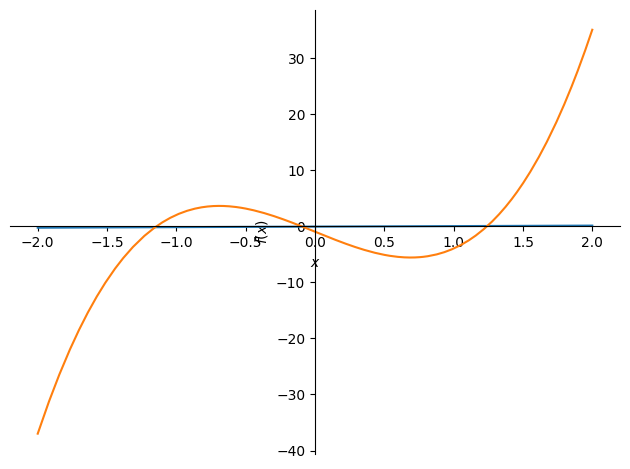

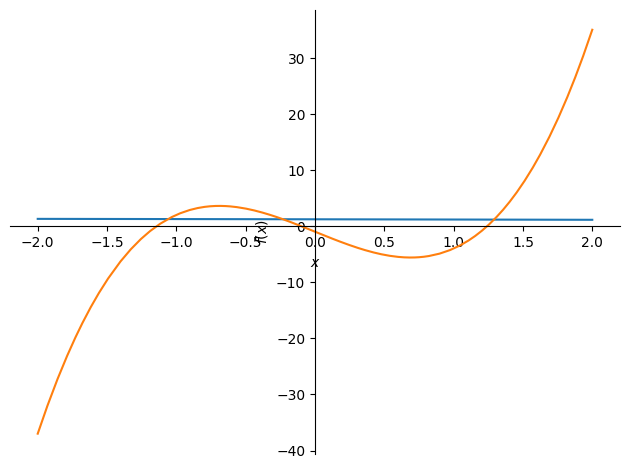

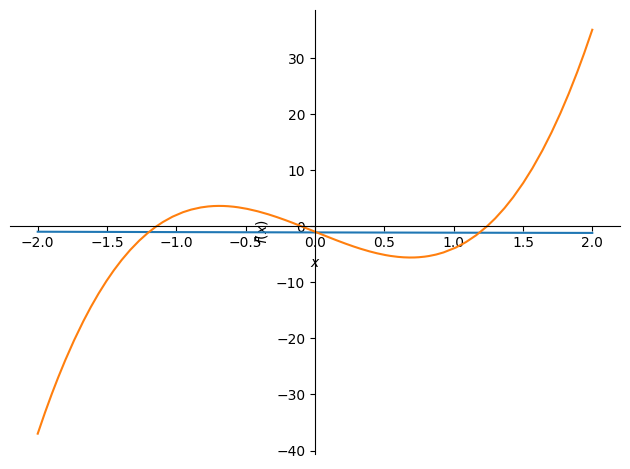

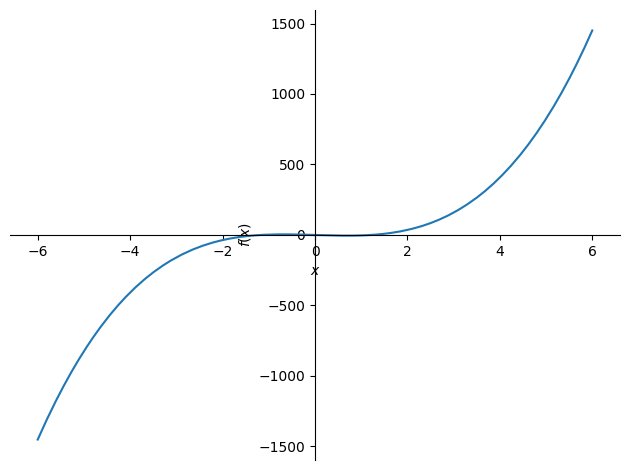

In [38]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x, y = sp.symbols('x, y')


equation1 = 7*x**3 - 10*x - y - 1
equation2 = 8*y**3 - 11*y + x - 1

solutions_f = sp.solve(equation1, y)
solutions_g = sp.solve(equation2, y)
print('Solución primera ecuación: 7*x**3-10*x-y-1 \n', solutions_f)
print('\n Solución segunda ecuación: 8*y**3-11*y+x-1 \n', solutions_g)

num_solutions = len(solutions_f) * len(solutions_g)
print("\n El número de soluciones es:", num_solutions)


for func in solutions_g:
    sp.plot(func, solutions_f[0], (x, -2, 2))


sp.plot(solutions_f[0], (x, -6, 6))

plt.show()


In [63]:

def newton(f, df, xk, tol, maxiter):
  print('\nMÉTODO DE NEWTON\n')
  for k in range(maxiter):
    xk1 = xk - f(xk)/df(xk)
    Ea=abs(xk1 - xk)
    print(k,"\t\t",xk,"\t\t",Ea)
    if Ea<tol:
      print("El valor de la raiz es =", xk1)
      return xk1#[xk1,k]
    xk=xk1
  return [None]


equation1 = x**2 + x * y**3 - 9
equation2 = 3 * x**2 * y - y**3 - 4



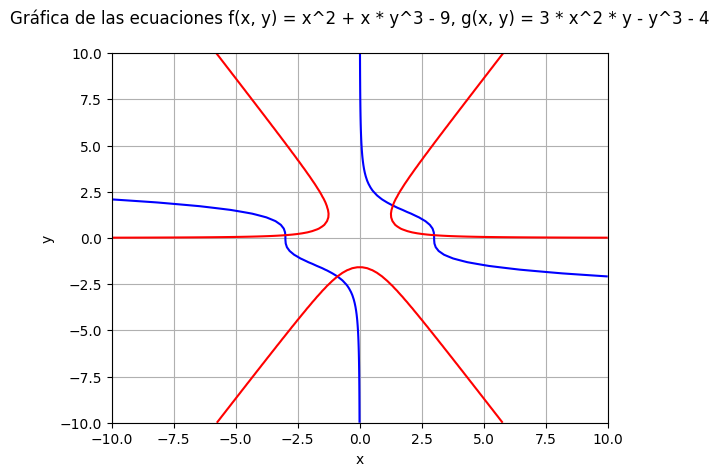

In [66]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x, y = sp.symbols('x y')

f = x**2 + x * y**3 - 9
g = 3 * x**2 * y - y**3 - 4


f_numeric = sp.lambdify((x, y), f)
g_numeric = sp.lambdify((x, y), g)


x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z_f = f_numeric(X, Y)
Z_g = g_numeric(X, Y)

plt.contour(X, Y, Z_f, levels=[0], colors='blue')
plt.contour(X, Y, Z_g, levels=[0], colors='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de las ecuaciones f(x, y) = x^2 + x * y^3 - 9, g(x, y) = 3 * x^2 * y - y^3 - 4\n ')
plt.grid(True)
plt.show()


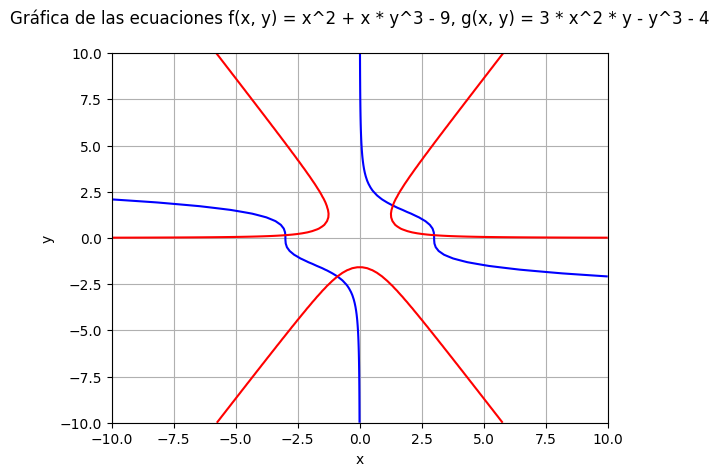

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x, y = sp.symbols('x y')

# f = x**2 + x * y**3 - 9
# g = 3 * x**2 * y - y**3 - 4
x= sp.symbols('x')

f = sp.parse_expr(str("x**2 + x * y**3 - 9"))
df = sp.parse_expr(str("2*x + y**3"))


g = sp.parse_expr(str("x**2 + x * y**3 - 9"))
dg = sp.parse_expr(str("2*x + y**3"))


f_numeric = sp.lambdify((x, y), f)
g_numeric = sp.lambdify((x, y), g)


x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z_f = f_numeric(X, Y)
Z_g = g_numeric(X, Y)

plt.contour(X, Y, Z_f, levels=[0], colors='blue')
plt.contour(X, Y, Z_g, levels=[0], colors='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de las ecuaciones f(x, y) = x^2 + x * y^3 - 9, g(x, y) = 3 * x^2 * y - y^3 - 4\n ')
plt.grid(True)
plt.show()


In [68]:
import numpy as np
import sympy as sym

def matrizJacobiano(variables, funciones):
    n = len(funciones)
    m = len(variables)
    Jcb = sym.zeros(n,m)
    for i in range(0,n,1):
        unafi = sym.sympify(funciones[i])
        for j in range(0,m,1):
            unavariable = variables[j]
            Jcb[i,j] = sym.diff(unafi, unavariable)
    return Jcb

# PROGRAMA ----------
# INGRESO
x = sym.Symbol('x')
y = sym.Symbol('y')

f1 = x**2 + x * y**3 - 9
f2 = 3 * x**2 * y - y**3 - 4

x0 = 1.5
y0 = 3.5

tolera = 0.0001

# PROCEDIMIENTO
funciones = [f1,f2]
variables = [x,y]
n = len(funciones)
m = len(variables)

Jxy = matrizJacobiano(variables, funciones)

# valores iniciales
xi = x0
yi = y0

# tramo inicial, mayor que tolerancia
itera = 0
tramo = tolera*2

while (tramo>tolera):
    J = Jxy.subs([(x,xi),(y,yi)])

    # determinante de J
    Jn = np.array(J,dtype=float)
    determinante =  np.linalg.det(Jn)

    # iteraciones
    f1i = f1.subs([(x,xi),(y,yi)])
    f2i = f2.subs([(x,xi),(y,yi)])

    numerador1 = f1i*Jn[n-1,m-1]-f2i*Jn[0,m-1]
    xi1 = xi - numerador1/determinante
    numerador2 = f2i*Jn[0,0]-f1i*Jn[n-1,0]
    yi1 = yi -numerador2/determinante

    tramo = np.max(np.abs([xi1-xi,yi1-yi]))
    xi = xi1
    yi = yi1

    itera = itera +1
    print('iteración: ',itera)
    print('Jacobiano con puntos iniciales: ')
    print(J)
    print('determinante: ', determinante)
    print('puntos xi,yi:',xi,yi)
    print('error:',tramo)

# SALIDA
print('Resultado: ')
print(xi,yi)

iteración:  1
Jacobiano con puntos iniciales: 
Matrix([[45.8750000000000, 55.1250000000000], [31.5000000000000, -30.0000000000000]])
determinante:  -3112.6874999999986
puntos xi,yi: 1.35696644780435 2.57481477019457
error: 0.925185229805434
iteración:  2
Jacobiano con puntos iniciales: 
Matrix([[19.7841079675118, 26.9887237313404], [20.9636235147906, -14.3649394810360]])
determinante:  -849.9789570881027
puntos xi,yi: 1.30387439974437 2.02070802142732
error: 0.554106748767245
iteración:  3
Jacobiano con puntos iniciales: 
Matrix([[10.8588268695835, 15.9721780957096], [15.8084967509831, -7.14951737265594]])
determinante:  -330.1314968828991
puntos xi,yi: 1.32307426054949 1.79112468854516
error: 0.229583332882157
iteración:  4
Jacobiano con puntos iniciales: 
Matrix([[8.39230515886793, 12.7337733544830], [14.2187458370930, -4.37280645296229]])
determinante:  -217.75621302846736
puntos xi,yi: 1.33586129388881 1.75496650381162
error: 0.0361581847335442
iteración:  5
Jacobiano con puntos in

iteración:  1
Jacobiano con puntos iniciales: 
Matrix([[45.8750000000000, 55.1250000000000], [31.5000000000000, -30.0000000000000]])
determinante:  -3112.6874999999986
puntos xi,yi: 1.35696644780435 2.57481477019457
error: 0.925185229805434
iteración:  2
Jacobiano con puntos iniciales: 
Matrix([[19.7841079675118, 26.9887237313404], [20.9636235147906, -14.3649394810360]])
determinante:  -849.9789570881027
puntos xi,yi: 1.30387439974437 2.02070802142732
error: 0.554106748767245
iteración:  3
Jacobiano con puntos iniciales: 
Matrix([[10.8588268695835, 15.9721780957096], [15.8084967509831, -7.14951737265594]])
determinante:  -330.1314968828991
puntos xi,yi: 1.32307426054949 1.79112468854516
error: 0.229583332882157
iteración:  4
Jacobiano con puntos iniciales: 
Matrix([[8.39230515886793, 12.7337733544830], [14.2187458370930, -4.37280645296229]])
determinante:  -217.75621302846736
puntos xi,yi: 1.33586129388881 1.75496650381162
error: 0.0361581847335442
iteración:  5
Jacobiano con puntos in

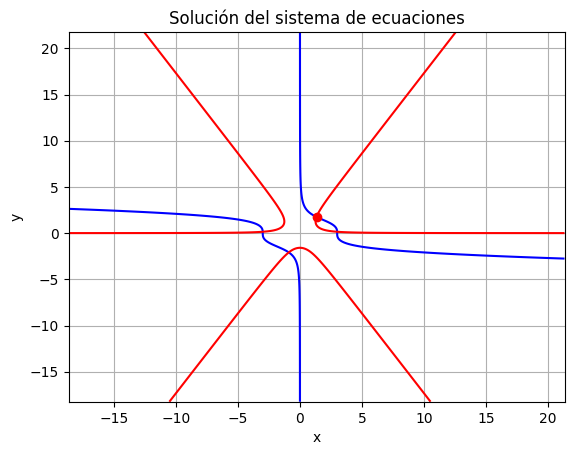

In [87]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def matrizJacobiano(variables, funciones):
    n = len(funciones)
    m = len(variables)
    Jcb = sym.zeros(n,m)
    for i in range(0,n,1):
        unafi = sym.sympify(funciones[i])
        for j in range(0,m,1):
            unavariable = variables[j]
            Jcb[i,j] = sym.diff(unafi, unavariable)
    return Jcb

# INGRESO
x = sym.Symbol('x')
y = sym.Symbol('y')

f1 = x**2 + x * y**3 - 9
f2 = 3 * x**2 * y - y**3 - 4

x0 = 1.5
y0 = 3.5

tolera = 0.0001

# PROCEDIMIENTO
funciones = [f1,f2]
variables = [x,y]
n = len(funciones)
m = len(variables)

Jxy = matrizJacobiano(variables, funciones)

# valores iniciales
xi = x0
yi = y0

# tramo inicial, mayor que tolerancia
itera = 0
tramo = tolera*2

while (tramo>tolera):
    J = Jxy.subs([(x,xi),(y,yi)])

    # determinante de J
    Jn = np.array(J,dtype=float)
    determinante =  np.linalg.det(Jn)

    # iteraciones
    f1i = f1.subs([(x,xi),(y,yi)])
    f2i = f2.subs([(x,xi),(y,yi)])

    numerador1 = f1i*Jn[n-1,m-1]-f2i*Jn[0,m-1]
    xi1 = xi - numerador1/determinante
    numerador2 = f2i*Jn[0,0]-f1i*Jn[n-1,0]
    yi1 = yi -numerador2/determinante

    tramo = np.max(np.abs([xi1-xi,yi1-yi]))
    xi = xi1
    yi = yi1

    itera = itera +1
    print('iteración: ',itera)
    print('Jacobiano con puntos iniciales: ')
    print(J)
    print('determinante: ', determinante)
    print('puntos xi,yi:',xi,yi)
    print('error:',tramo)

# SALIDA
print('Resultado: ')
print(xi,yi)

# Gráfica
x_range = np.linspace(float(xi)-20, float(xi)+20, 10000)
y_range = np.linspace(float(yi)-20, float(yi)+20, 10000)
X, Y = np.meshgrid(x_range, y_range)
Z1 = X**2 + X * Y**3 - 9
Z2 = 3 * X**2 * Y - Y**3 - 4

plt.contour(X, Y, Z1, levels=[0], colors='blue')
plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.plot(xi, yi, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución del sistema de ecuaciones')
plt.grid()
plt.show()


Solución:
1.33635537721714 1.75423519765171


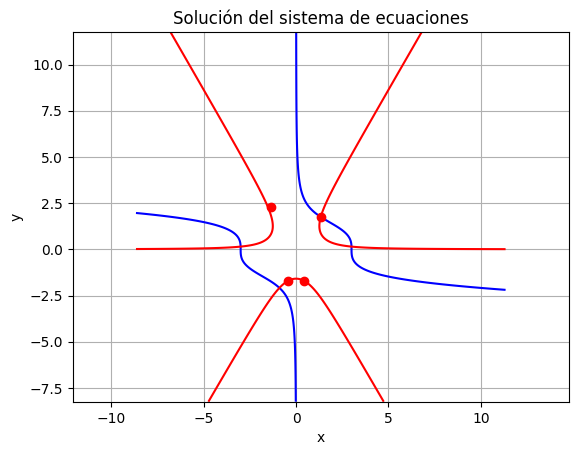

In [97]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def matrizJacobiano(variables, funciones):
    n = len(funciones)
    m = len(variables)
    Jcb = sym.zeros(n, m)
    for i in range(n):
        unafi = sym.sympify(funciones[i])
        for j in range(m):
            unavariable = variables[j]
            Jcb[i, j] = sym.diff(unafi, unavariable)
    return Jcb

# Definición de las funciones
x = sym.Symbol('x')
y = sym.Symbol('y')

f1 = x**2 + x * y**3 - 9
f2 = 3 * x**2 * y - y**3 - 4

# Matriz jacobiana
funciones = [f1, f2]
variables = [x, y]
Jxy = matrizJacobiano(variables, funciones)

# Valores iniciales y tolerancia
x0 = 1.5
y0 = 3.5
tolerancia = 0.0001

# Algoritmo de Newton-Raphson
xi = x0
yi = y0
tramo = tolerancia * 2

while tramo > tolerancia:
    J = Jxy.subs([(x, xi), (y, yi)])

    Jn = np.array(J, dtype=float)
    determinante = np.linalg.det(Jn)

    f1i = f1.subs([(x, xi), (y, yi)])
    f2i = f2.subs([(x, xi), (y, yi)])

    numerador1 = f1i * Jn[1, 1] - f2i * Jn[0, 1]
    numerador2 = f2i * Jn[0, 0] - f1i * Jn[1, 0]
    xi1 = xi - numerador1 / determinante
    yi1 = yi - numerador2 / determinante

    tramo = np.max(np.abs([xi1 - xi, yi1 - yi]))
    xi = xi1
    yi = yi1

# Resultado
print("Solución:")
print(xi, yi)

# Coordenadas de las soluciones
soluciones = [(1.33635537721714, 1.75423519765171),
              (-1.34731328607065, 2.30334032603298),
              (0.425786164161139, -1.73456037566653),
              (-0.425786164161139, -1.73456037566653)]

# Gráfica
x_range = np.linspace(float(xi) - 10, float(xi) + 10, 1000)
y_range = np.linspace(float(yi) - 10, float(yi) + 10, 1000)
X, Y = np.meshgrid(x_range, y_range)
Z1 = X**2 + X * Y**3 - 9
Z2 = 3 * X**2 * Y - Y**3 - 4

plt.contour(X, Y, Z1, levels=[0], colors='blue')
plt.contour(X, Y, Z2, levels=[0], colors='red')

# Puntos de solución
for solucion in soluciones:
    plt.plot(solucion[0], solucion[1], 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución del sistema de ecuaciones')
plt.grid()
plt.axis('equal')
plt.show()
